In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from distance_calculator import calculate_distance_matrix
from itertools import product
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from distance_calculator import calculate_distance_matrix

### Przygotowanie Danych

In [2]:
attr = pd.read_csv('attr_desc.csv')
df_raw = pd.read_csv("USCensus1990.data.txt").drop('caseid', axis=1)

### Wybór kolumn

Chcemy klastrować ludzi pod względem lepszej personalizacji produktów.

In [3]:
attr

,Feature Name,Description,Ordered
0,dAge,Age,1
1,dAncstry1,Ancestry,0
2,dAncstry2,ANcestry,0
3,iAvail,Available for work,0
4,iCitizen,Citizenship,0
...,...,...,...
63,iWorklwk,Worked Last Week,0
64,iWWII,Served World War II September 1940 July,0
65,iYearsch,Ed. Attainment,0
66,iYearwrk,Yr. Last Worked,0


In [4]:
columns = [
    'dAge',
    'iAvail',
    'iCitizen',
    'iClass',
    'dDepart',
    'iDisabl1', 
    'iDisabl2',
    'iEnglish', 
    'iFertil',
    'dHispanic',
    'dHour89',
    'dIncome1',
    'dIncome2',
    'dIncome3',
    'dIncome4',
    'iMarital',
    'iMeans',
    'iMilitary',
    'dOccup',
    'iRagechld',
    'dRearning',
    'iRownchld',
    'iRvetserv',
    'iSex',
    'iYearsch',
]

In [5]:
df = df_raw.copy()[columns]
df = MinMaxScaler().fit_transform(df)

### Wybór liczby klastrów

In [6]:
from yellowbrick.cluster import KElbowVisualizer

In [7]:
def evaluate_clustering(model, metrics, samples = 10000):
    subset = df[np.random.choice(np.arange(df.shape[0]), samples)]
    for metric in metrics:
        visualizer = KElbowVisualizer(model, k=(2,10), timings=True, metric=metric)
        visualizer.fit(df[:samples, :])  
        visualizer.show()
    return subset

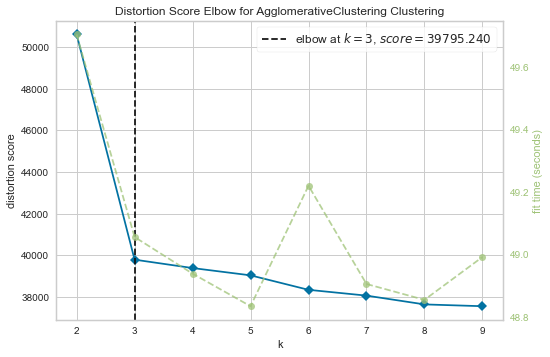

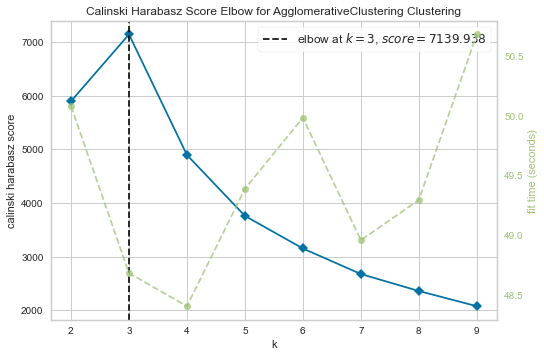

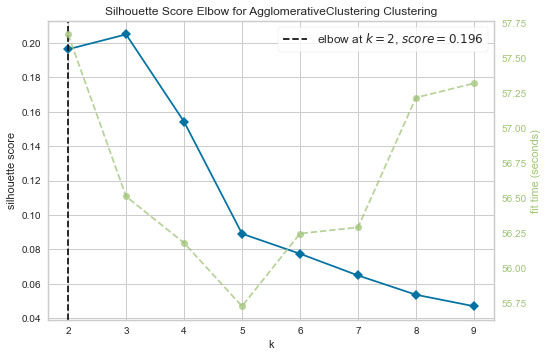

In [27]:
agg = AgglomerativeClustering(affinity="hamming", linkage="complete")
subset_evaluated = evaluate_clustering(agg, ['distortion', 'calinski_harabasz', 'silhouette'], 25000)

In [8]:
subset_idx = np.random.choice(np.arange(df.shape[0]), 25000)
subset = df[subset_idx]

In [9]:
agg = AgglomerativeClustering(affinity='hamming', linkage='complete', n_clusters=3)
labels = agg.fit_predict(subset)

In [10]:
tsne_projection2 = TSNE(n_components=2, metric='hamming', n_iter=1000, random_state=42).fit_transform(subset[:15000])

c:\Users\jasie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jasie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Wizualizacja tSNE

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

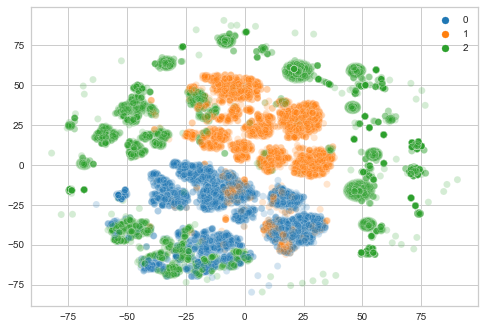

In [11]:
sns.scatterplot(tsne_projection2[:15000,0], 
                tsne_projection2[:15000,1], 
                hue=labels[:15000],
                alpha=0.2,
                palette=sns.color_palette("tab10")[:3])

In [50]:
r_jitter = (np.random.rand(subset.shape[0]) * 2 - 1) / 30
theta_jitter = (np.random.rand(subset.shape[0]) * 2*np.pi)
x_jitter = r_jitter * np.cos(theta_jitter)
y_jitter = r_jitter * np.sin(theta_jitter)

# x_jitter = (np.random.rand(subset.shape[0]) * 2 - 1) / 30
# y_jitter = (np.random.rand(subset.shape[0]) * 2 - 1) / 30

### Age vs Income

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

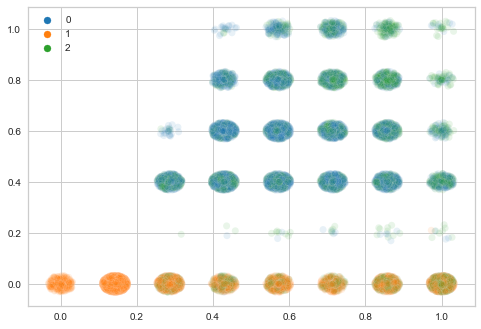

In [52]:
sns.scatterplot(subset[:,0] + x_jitter, 
                subset[:,20] + y_jitter, 
                hue=labels,
                alpha=0.1,
                palette=sns.color_palette("tab10")[:3])

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

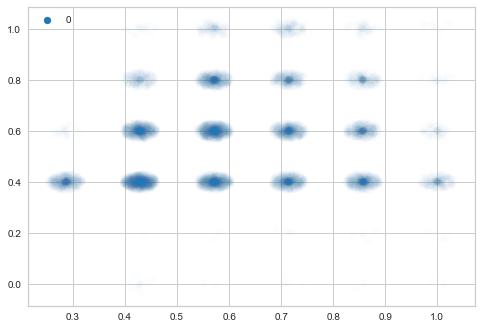

In [65]:
subset_0 = subset[labels==0,:]
labels_0 = labels[labels==0]
sns.scatterplot(subset_0[:,0] + x_jitter[labels==0], 
                subset_0[:,20] + y_jitter[labels==0], 
                hue=labels_0,
                alpha=0.01,
                palette=sns.color_palette("tab10")[:1])

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

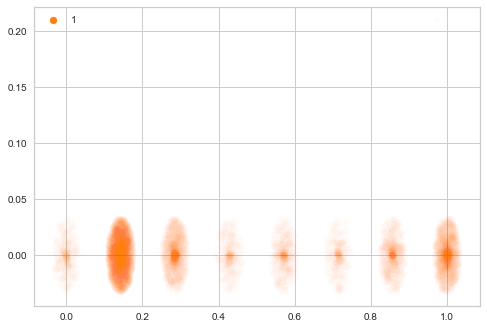

In [62]:
subset_1 = subset[labels==1,:]
labels_1 = labels[labels==1]
sns.scatterplot(subset_1[:,0] + x_jitter[labels==1], 
                subset_1[:,20] + y_jitter[labels==1], 
                hue=labels_1,
                alpha=0.01,
                palette=sns.color_palette("tab10")[1:2])

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

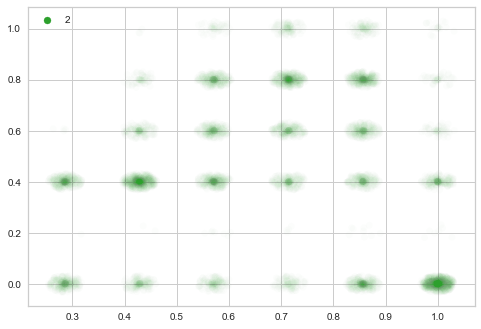

In [61]:
subset_2 = subset[labels==2,:]
labels_2 = labels[labels==2]
sns.scatterplot(subset_2[:,0] + x_jitter[labels==2], 
                subset_2[:,20] + y_jitter[labels==2], 
                hue=labels_2,
                alpha=0.01,
                palette=sns.color_palette("tab10")[2:3])

### Hours Worked vs Class of Worker

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

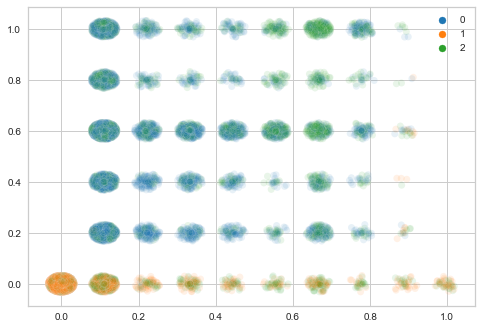

In [67]:
sns.scatterplot(subset[:,3] + x_jitter, 
                subset[:,10] + y_jitter, 
                hue=labels,
                alpha=0.1,
                palette=sns.color_palette("tab10")[:3])

### Year of Education Attainment vs Occupation Type

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

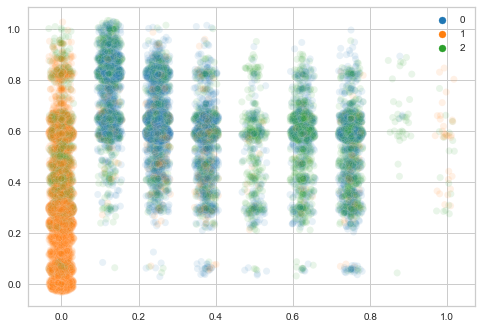

In [68]:
sns.scatterplot(subset[:,18] + x_jitter, 
                subset[:,24] + y_jitter, 
                hue=labels,
                alpha=0.1,
                palette=sns.color_palette("tab10")[:3])

### Interpretowalność

In [83]:
df_labeled = df_raw.iloc[subset_idx][columns]
df_labeled = MinMaxScaler().fit_transform(df_labeled)
df_labeled = pd.DataFrame(data=df_labeled, columns=columns)
# df_labeled['label'] = labels

In [80]:
from sklearn.linear_model import LogisticRegression

In [85]:
logreg = LogisticRegression(random_state=42,max_iter=1000).fit(df_labeled, labels)

Co charakteryzuje przydział danych obserwacji do poszczególnych klastrów? Analizując współczynniki regresji logistycznej możemy uzyskać wiele przydatnych informacji na temat decyzyjnych cech na podstawie których następuje przydzielenie poszczególnych obserwacji (w naszym przypadku są to po prostu różne osoby gdyż analizujemy spis powszechny) do danych klastrów (grup) 

In [88]:
coeff = logreg.coef_
decision_features_cluster_0 = [i for i,v in enumerate(coeff[0]) if v > 0.5]
decision_features_cluster_1 = [i for i,v in enumerate(coeff[1]) if v > 0.5]
decision_features_cluster_2 = [i for i,v in enumerate(coeff[2]) if v > 0.5]
decision_features = [decision_features_cluster_0, decision_features_cluster_1, decision_features_cluster_2]

Postararajmy się zwizualizować powyższe dane

In [120]:
def plot_feature_importance(label):
    values = coeff[label][decision_features[label]]
    features = df_labeled.columns[decision_features[label]].values

    # sort featured and values
    sorted_idx = np.argsort(values)[::-1]
    values = values[sorted_idx]
    features = features[sorted_idx]

    # plot
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 6))
    sns.set(font_scale = 1.2)
    plots = sns.barplot(features,values,color='c')

    # annotate with values
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

    # styling
    plt.title(f'Cluster no. {label}. The most decisive features')
    plt.ylabel("coeffs", size=14)
    plt.show()

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


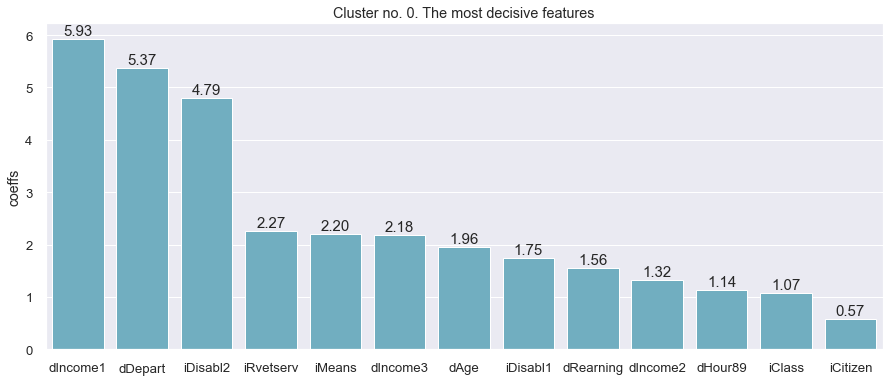

In [121]:
plot_feature_importance(0)

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


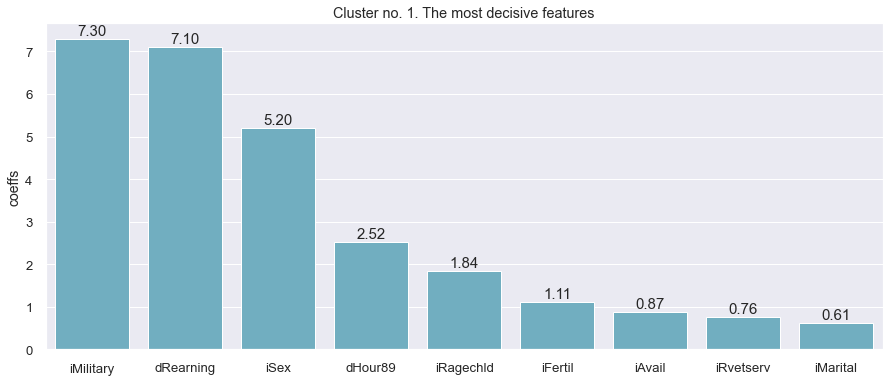

In [122]:
plot_feature_importance(1)

c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


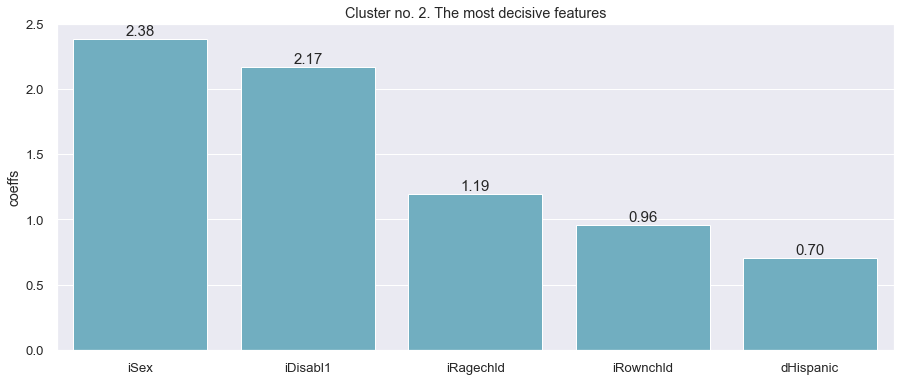

In [123]:
plot_feature_importance(2)

### Jaki jest rozkład najważniejszych cech w klastrach?

<AxesSubplot:ylabel='dIncome1'>

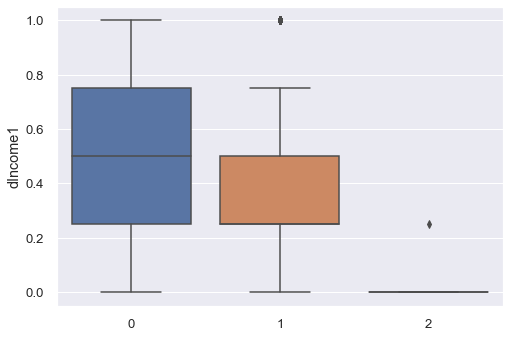

In [101]:
sns.boxplot(x=labels, y=df_labeled['dIncome1'])

Grupa 0 To ludzie z reguły bogaci. Grupa 2 to ludzie biedni.

<AxesSubplot:ylabel='dDepart'>

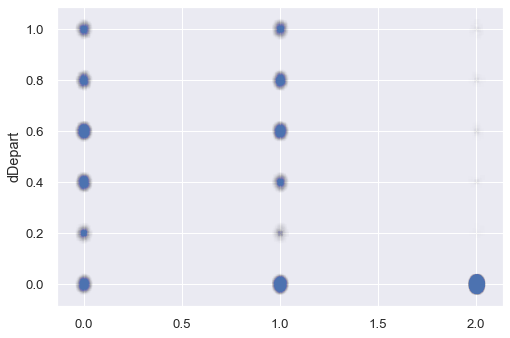

In [112]:
sns.scatterplot(x=labels + x_jitter, y=df_labeled['dDepart'] + y_jitter, alpha=0.002)

Grupa 2 to ludzie wyjeżdżający do pracy rano. Możemy zatem założyć, że prawodopodbnie jest to po prostu klasa robotnicza.

<AxesSubplot:ylabel='iMilitary'>

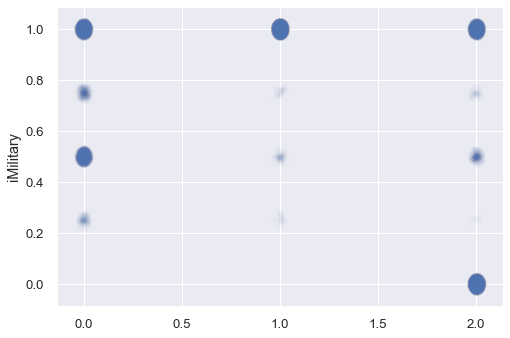

In [114]:
sns.scatterplot(x=labels + x_jitter, y=df_labeled['iMilitary'] + y_jitter, alpha=0.02)

Grupa 2 to ludzie młodzi, lub niezbyt aktywnie miltatnie (iMilitary = 0 to poniżej 16 lat, = 4 to brak służby). Podobnie grupa 1 to ludzie nieaktywni militatnie. Grupa 0 to weteranie (iMilitary = 2 to służba w przeszłości)

<AxesSubplot:ylabel='iSex'>

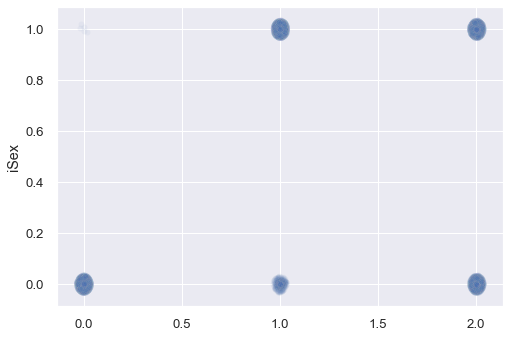

In [119]:
sns.scatterplot(x=labels + x_jitter, y=df_labeled['iSex'] + y_jitter, alpha=0.05)

Grupa 0 to w dominującej częśći mężczyźni. Grupa 1 to raczej kobiety ale nie tylko. Grupa 2 jest mniej więcej równa.

In [19]:
label_desc = {0: 'Wealthy, military men', 1: 'General population, mostly women', 2: 'The youth'}


c:\Users\jasie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

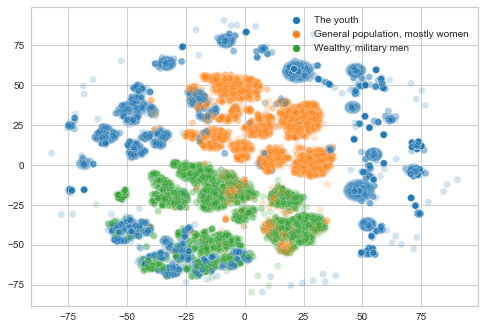

In [20]:
described_labels = labels
sns.scatterplot(tsne_projection2[:15000,0], 
                tsne_projection2[:15000,1], 
                hue=np.vectorize(label_desc.get)(labels)[:15000],
                alpha=0.2,
                palette=sns.color_palette("tab10")[:3])

### Podsumowanie

Nasza praca miała następujący przebieg

- Sprawdziliśmy 3 algorytmy. Dwa z nich nie były wystarczająco dobre, dlatego w finalnym notebooku został zaprezentowany końcowy model.
    - ```KMeans```: Nie nadawał się do naszego zadania. Brak możliwości użycia dystansu hamminga.
    - ```DBSCAN```: Dobre rezultaty jednak z przyczyn opisanych niżej został odrzucony.
    - ```AgglomerativeClustering``` Najlepszy algorytm do naszego zadania. Dobrze oddaje strukturę danych.

- Wyznaczyliśmy optymalną liczbę klastrów równą 3 korzystając z 3 metryk (```silhouette``` z jakiegoś powodu dała ```n_clusters=2``` jednak patrząc na wykres nie miało to większego sensu)

- Skorzystaliśmy z regresji logistycznej, aby znaleźć atrybuty najbardziej decydujące o przynależności do grupy.

- Opisaliśmy po krótce stworzone klastry

#### Dlaczego nie DBSCAN?

Dla każdej osoby możemy znaleźć kogoś innego dość podobnego nawet w małym podzbiorze danych. To oznaczało, że w zależności od wartości hiperparametru ```eps``` liczba klastrów stowrzonych przez DBSCAN była równa prawie 1 lub prawie 0. To znaczy albo praktycznie wszystkie osoby były w jednym klastrze albo wszystkie były oznaczone jako outlierzy. Tylko dla bardzo małego zakresu tego parametru otrzymywaliśmy inne, jednak nadal niesatysfakjonujące wyniki.